# Aineiston kerääminen ja esikäsittely

Ensimmäiseksi tavoitteena on lukea dataa [Inside AirBnb -sivustolta](http://insideairbnb.com/get-the-data/). Löysin sivulta dataa Tukholman kohteista ja päätin alkaa lukemaan yleistä dataa Tukholman AirBnb-asunnoista. Käyttämäni tiedoston löytää, kun hakee sivulta "Stockholm" ja lataa tiedoston "listings.csv". Pandas-kirjastolla dataa voi lukea CSV-tiedostosta seuraavasti:

In [34]:
import pandas

data = pandas.read_csv("listings.csv")

# print(data)

Huomaamme, että näämme nyt datasta vain osan: ensimmäiset ja viimeiset 5 riviä per sarake. Voimme kasvattaa näkyvien rivien määrää:

In [3]:
pandas.options.display.max_rows = 4589

Ja tulostaa tiedon uudelleen:

In [35]:
# print(data)

Katsotaan, millaisia muuttujia data sisältää tulostamalla sarakkeiden otsikot:

In [11]:
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


Datassa näyttäisi siis olevan vuokrattavan kohteen tunnus ja nimi, vuokraajan tunnus ja nimi, kohteen naapurusto, koordinaatit, huoneiden määrä, hinta, kuinka monta yötä kohteessa on oltava vähintään, arvostelujen määrä kokonaisuudessaan ja per kuukausi, viimeisin arvostelu, kuinka monta kohdetta samalla vuokraajalla on, kuinka monta päivää vuodessa kohde on vapaana ja onko vuokraajalla lisenssi. Ainoa muuttuja, jonka sisältö ei ole täysin selkeä nimensä perusteella on 'number_of_reviews_ltm'. Se voisi ehkä tarkoittaa arvostelujen määrää viime kuukaudelta.

Huomataan, että datassa on paljon tyhjiä arvoja, ja kaikki "license" sekä "neighbourhood_group" -arvot ovat tyhjiä. Poistetaan tyhjät sarakkeet kokonaan ja tulostetaan puhdistettu data:

In [36]:
new_data = data.drop(columns=["license", "neighbourhood_group"])

# print(new_data)

Datassa on vieläkin monia tyhjiä arvoja. Testataan poistaa kaikki rivit, joilla esiintyy jokin tyhjä arvo:

In [37]:
cleaned_data = new_data.dropna()

# print(cleaned_data)

Rivejä ei poistunut kuin parikymmentä, joten dataa on vielä riittävästi poiston jälkeen. Nyt dataa voitaisiin visualisoida jollain tavalla. Otetaan esimerkkinä keskihinta naapuruston mukaan. Ensin kategorisoidaan data naapuruston mukaan ja sitten lasketaan kategorioille keskihinta.

In [17]:
grouped_neighborhood = cleaned_data.groupby('neighbourhood')

neighborhood_prices = grouped_neighborhood['price'].mean()

print(neighborhood_prices)

neighbourhood
Bromma                    1667.857143
Enskede-Årsta-Vantörs     1282.362205
Farsta                    4860.576471
Hägersten-Liljeholmens    1339.943262
Hässelby-Vällingby        1129.122222
Kungsholmens              1468.828283
Norrmalms                 1737.666667
Rinkeby-Tensta             781.263158
Skarpnäcks                1349.156250
Skärholmens                852.152174
Spånga-Tensta             1160.085106
Södermalms                1756.575342
Älvsjö                    1578.370000
Östermalms                4511.971429
Name: price, dtype: float64


Sitten piirretään visualisointi:

<Axes: title={'center': 'Mean Price per Neighborhood'}, xlabel='neighbourhood', ylabel='Mean Price'>

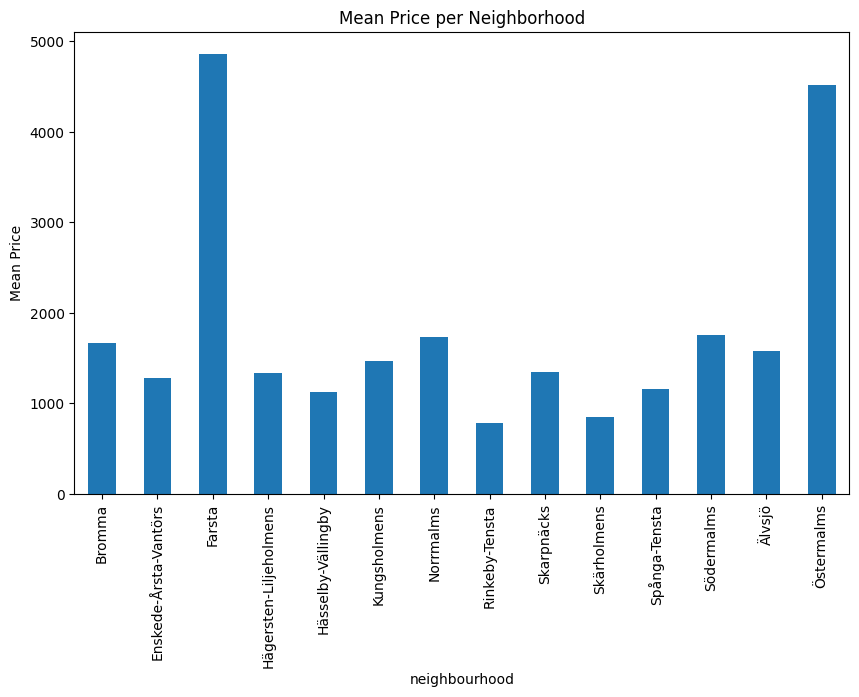

In [18]:
neighborhood_prices.plot(kind='bar', figsize=(10, 6), ylabel='Mean Price', title='Mean Price per Neighborhood')

Testataan erilaista visualisointia Seaborn -kirjastolla. Visualisoinnissa näkyy edelleen keskihinta, mutta Seaborn lisää kaavioon myös hintojen vaihteluvälit.

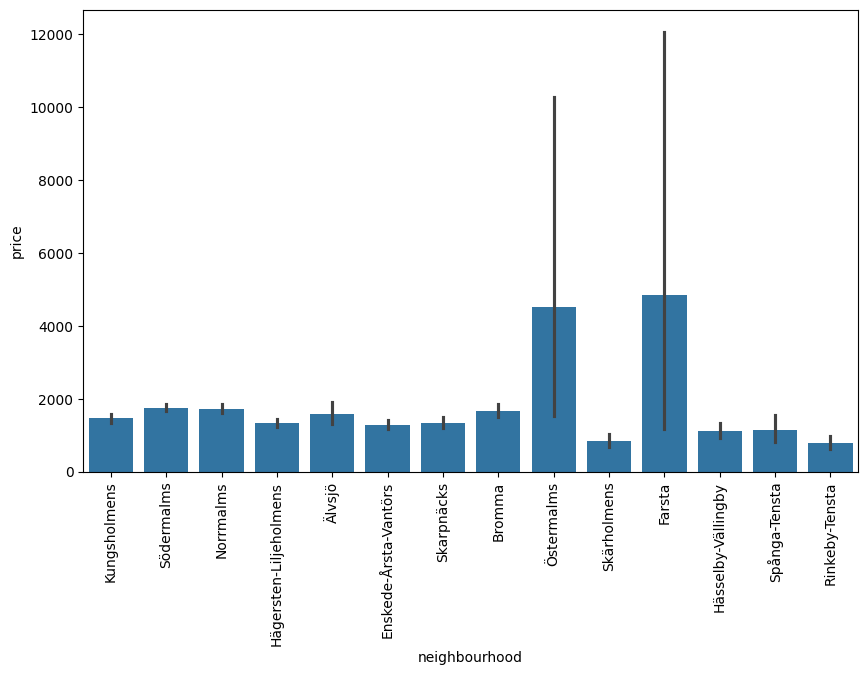

In [33]:
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
seaborn.barplot(x='neighbourhood', y='price', data=cleaned_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()
